# Chaines de Markov et épidémiologie : propagation d’une épidémie dans une population
## PROJET 3,LU3IN005, Groupe 2
### Binome 7:
### TAWBI Chadi, 28706563
#### SLIM Jad, 28706636

In [ ]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import matplotlib
import math

# 1 Apprentissage des paramètres d’un modèle à partir de données

## Question 1.1.1

Grace a la séquence d'observation et la formule suivante: $p(x|y)=P(X_i|X_{i-1})$ on peut déduire la Matrice de transition suivante:

$$\begin{matrix}
& S & I & R \\
S & \frac{2}{3} & \frac{1}{3} & 0 \\
I & 0 & \frac{5}{6} & \frac{1}{6} \\
R & 0 & 0 & 1
\end{matrix}$$




## Question 1.2.1

In [3]:
#lire les données
data = np.loadtxt('data_exo_2022.txt',dtype=int)

## Question 1.2.2

In [4]:
mat_transition = np.zeros((3,3))

for ind in data:
    for i in range(0, len(ind) - 1) :
        mat_transition[ind[i]][ind[i + 1]] += 1

for ligne in range(0, len(mat_transition)) :
    somme_ligne = sum(mat_transition[ligne])
    for colonne in range(0, len(mat_transition[ligne])) :
        mat_transition[ligne][colonne] = mat_transition[ligne][colonne] / somme_ligne

print(mat_transition)

[[0.93082918 0.06917082 0.        ]
 [0.         0.93518148 0.06481852]
 [0.04065945 0.         0.95934055]]


# 2 Description du premier modèle

## Question 2.1.1

A partir du graphe de transition, la matrice de transition A est la suivante:
$$\begin{matrix}
 & S & I & R \\
S & 0.92 & 0.08 & 0 \\
I & 0 & 0.93 & 0.07 \\
R & 0 & 0 & 1 
\end{matrix}$$

In [5]:
def verifie_matrice_stochastique(matrix):
  # si matrice n'est pas carre
  if matrix.shape[0] != matrix.shape[1]:
    return False
  if not np.all(matrix >= 0):
    return False
#check si somme = 1
  for i in range(matrix.shape[0]):
    if (np.sum(matrix[i, :]) -1)>1e-10:
        return False       
  
  return True

print(verifie_matrice_stochastique(mat_transition))

True


## Question 2.1.2

D'apres l'énoncé,au temps t = 0, un individu a une probabilité de 0.9 d’être sain et 0.1 d’être infecté.

On a donc le vecteur de distribution initiale suivant: $\pi_0 = (0.9, 0.1, 0)$

## Distribution $π_t$

## Question 1

On suppose que la chaîne de Markov est homogène. On a donc:\
$\pi_t$ = $\pi_{t-1} * A$\
\
$\pi_1 = \pi_0 * A = (0.828, 0.165, 0.007)$

## Question 2

$\pi_2 = \pi_1 * A = (0.76176, 0.21969, 0.01855)$


## Question 3 et 4

$\pi_{t+1} = \pi_t * A$

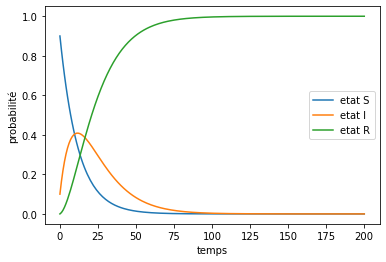

In [6]:
pi_0 = np.array([0.9, 0.1, 0])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0, 0, 1]])
pi_liste = [pi_0]

for i in range(0, 200):
    pi_0 = np.dot(pi_0, A)
    pi_liste.append(pi_0)
    
pi_0 = np.array([0.9, 0.1, 0])
plt.plot(pi_liste)
plt.legend(('etat S','etat I','etat R'))
plt.xlabel('temps')
plt.ylabel('probabilité')
plt.show()

D'après le graphique, on voit que le nombre de personnes infectées atteint un maximum à environ 10 jours. A 100 jours, la probabilité d'être guéri tend vers 1 (donc tout le monde est guéri), et la probabilité d'être infecté ou sain tend vers 0 (donc personne n'est infecté).

## Tirage aléatoire des états

In [7]:
def genere_seq_alea(matrice,pi_0,T):
    t0 = rd.random()
    if t0 < pi_0[0] :
        t0 = 0
    else:
        t0 = 1
    sequence=[t0]
    
    for i in range(1,T):
        etat_precedent=sequence[i-1]
        proba=matrice[etat_precedent]
        etat_present=rd.random()
        
        if etat_present < proba[0]:
            sequence.append(0)
        elif etat_present < proba[0] + proba[1]:
            sequence.append(1)
        else:
            sequence.append(2)
            
    return sequence

In [8]:
etats={0:"S",1:"I",2:"R"}
sequence = genere_seq_alea(A,pi_0,150)
print(sequence)

[0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


## Modélisation d’une population

## Question 1 et 2

In [9]:
def compter_population(matrice,pi_0,T,nbrIndividu,afficher=True,graphe=True,retourner=True):
    """
    affiche le nombre et le pourcentage d'individu de
    chaque etat de chaque jour
    """
    liste_seq=[]
    for i in range(nbrIndividu):
        liste_seq.append(genere_seq_alea(matrice,pi_0,T))
    liste_nb_etat=[]
    for i in range(T):
        temps_i=[0,0,0]
        for j in range(nbrIndividu):
            etat_personnej=liste_seq[j][i]
            temps_i[etat_personnej]+=1
        if afficher:
            print("À " + str(i) + " jours: \n")
            print("Nombre d'individu sains: " + str(temps_i[0]) + ", Pourcentage de population sains: " + str(temps_i[0]/nbrIndividu*100) + "%")
            print("Nombre d'individu infectés: " + str(temps_i[1])+ ", Pourcentage de population infectés: " + str(temps_i[1]/nbrIndividu*100)+"%")
            print("Nombre d'individu guéris: " + str(temps_i[2]) + ", Pourcentage de population guéris: " + str(temps_i[2]/nbrIndividu*100)+"%")
            print("")
        liste_nb_etat.append(temps_i)
    if graphe:
        plt.plot(liste_nb_etat)
        plt.legend(('etat S','etat I','etat R'))
        plt.xlabel('temps')
        plt.ylabel("nombre d\'individu")
        plt.title("Distribution d\'une population de "+ str(nbrIndividu) + " individus dans " + str(T) + " jours")
        plt.show()
    if retourner:
        return liste_seq

À 0 jours: 

Nombre d'individu sains: 179, Pourcentage de population sains: 89.5%
Nombre d'individu infectés: 21, Pourcentage de population infectés: 10.5%
Nombre d'individu guéris: 0, Pourcentage de population guéris: 0.0%

À 1 jours: 

Nombre d'individu sains: 161, Pourcentage de population sains: 80.5%
Nombre d'individu infectés: 38, Pourcentage de population infectés: 19.0%
Nombre d'individu guéris: 1, Pourcentage de population guéris: 0.5%

À 2 jours: 

Nombre d'individu sains: 153, Pourcentage de population sains: 76.5%
Nombre d'individu infectés: 46, Pourcentage de population infectés: 23.0%
Nombre d'individu guéris: 1, Pourcentage de population guéris: 0.5%

À 3 jours: 

Nombre d'individu sains: 141, Pourcentage de population sains: 70.5%
Nombre d'individu infectés: 58, Pourcentage de population infectés: 28.999999999999996%
Nombre d'individu guéris: 1, Pourcentage de population guéris: 0.5%

À 4 jours: 

Nombre d'individu sains: 131, Pourcentage de population sains: 65.5%
Nomb

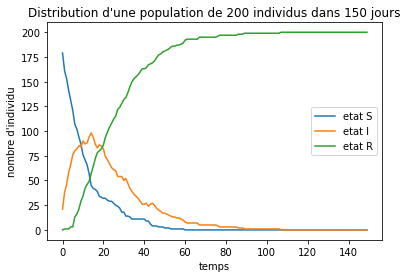

In [10]:
compter_population(A,pi_0,150,200,True,True,False)

## Question 3

On peut voir qu'à partir de 80 jours, le nombre d'individus sains est à 0. A 118 jours, le nombre d'individus infectés est à 0 et le nombre d'individus guéris est à 100%. On peut déduire que quand t est grand, tout les individus auront tendance à être gueri.

## Question 4

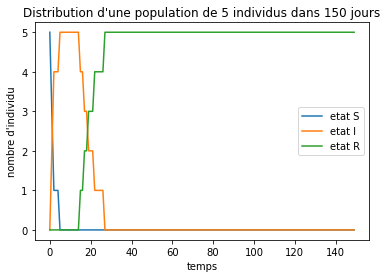

In [11]:
compter_population(A,pi_0,150,5,False,True,False)

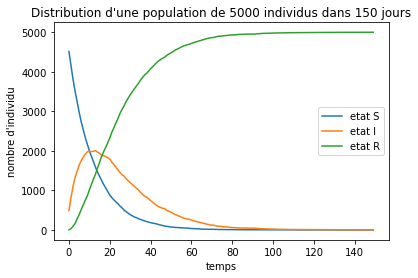

In [12]:
compter_population(A,pi_0,150,5000,False,True,False)

On peut tirer la même conclusion vu précédement avec n'importe quel nombre d'individu. On voit aussi que plus le nombre d'individus augmente, plus on se rapproche de la répartition théorique des effectifs.

## Longueur de l’infection

## Question 1

In [13]:
def longueur_moyenne_infection(matrice,pi_0,T,nbrIndividu):
    """
    Retourne la longueur moyenne d'une sequence d'individu infectés
    """
    list_seq=compter_population(matrice,pi_0,T,nbrIndividu,False,False,True)
    s = 0
    moy=0
    for etat in list_seq:
        s += etat.count(1)
    moyenne=s/len(list_seq)
    
    return moyenne

In [14]:
longueur_moyenne_infection(A,pi_0,150,1000)

14.785

## Question 2

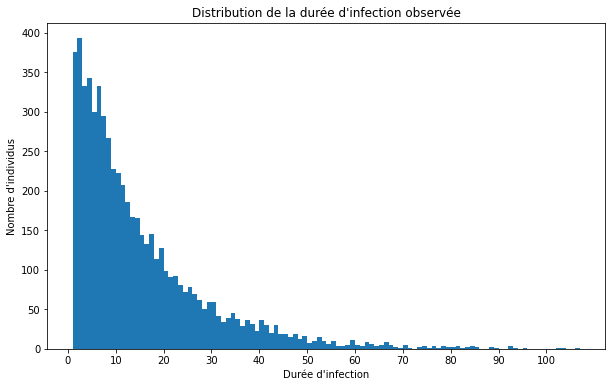

In [24]:
temps_inf = []
liste_seq = compter_population(A,pi_0,150,6000,False,False,True)
for etat in liste_seq :
    temps_inf.append(etat.count(1))
    

hist, bins = np.histogram(temps_inf, bins=np.arange(min(temps_inf), max(temps_inf)+ 1, 1))

plt.figure(figsize=(10, 6))

plt.bar(bins[:-1], hist, width=1, align='edge')

plt.xticks(np.arange(0, 101, step=10))

plt.title("Distribution de la durée d'infection observée")
plt.xlabel("Durée d'infection")
plt.ylabel("Nombre d'individus")

plt.show() 

## Question 3

La moyenne de longueur théorique d’une séquence de I est égale à l'espérance de $X$. Puisque $X$ suit la loi géométrique, on a $E(X)=\frac{1}{P}$.\
\
On sait que la probabilité $P = P(guéri | infecté) = 0.07$ \
Donc la longueur théorique d’une séquence de $I = \frac{1}{0.07} = 14.286$

## Question 4 et 5

In [25]:
def infection_theorique(T,p,nbrIndividu):
    prob_tmp_inf = []
    t=1
    for temps in range(1,T):
        t=(1-p) ** temps * p
        prob_tmp_inf.append(t*nbrIndividu)
    return prob_tmp_inf    

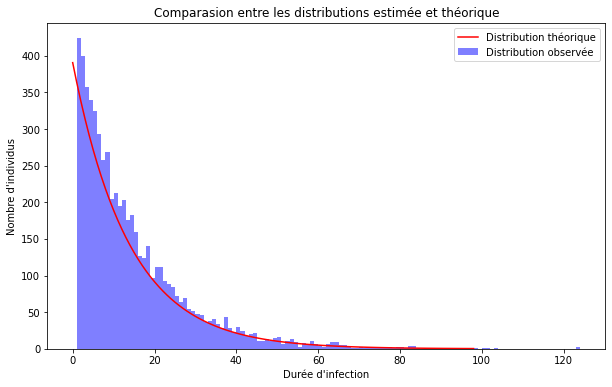

In [16]:
prob_tmp_inf=infection_theorique(100,0.07,6000)
hist, bins = np.histogram(temps_inf, bins=np.arange(min(temps_inf), max(temps_inf)+ 1, 1))

plt.figure(figsize=(10, 6))

plt.plot(prob_tmp_inf, color='red', label='Distribution théorique')

plt.bar(bins[:-1], hist, width=1, align='edge', color='blue', alpha=0.5, label='Distribution observée')

plt.title("Comparasion entre les distributions estimée et théorique")
plt.xlabel("Durée d'infection")
plt.ylabel("Nombre d'individus")

plt.legend()

plt.show()

## Petites modifications autour de ce premier modèle

## Question 1
### Variation de la taille de la population

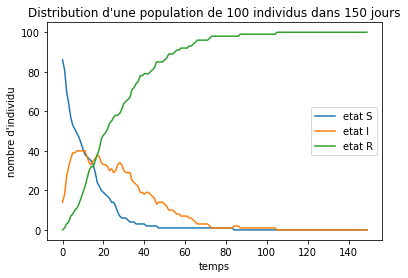

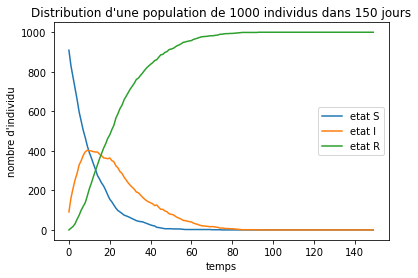

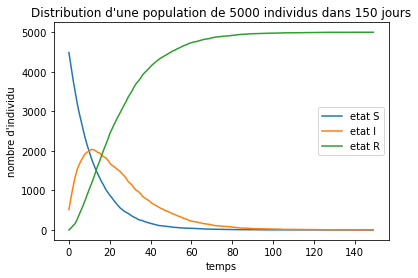

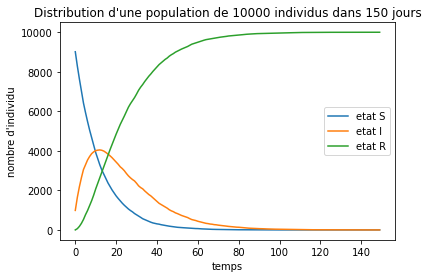

In [26]:
compter_population(A,pi_0,150,100,False,True,False)
compter_population(A,pi_0,150,1000,False,True,False)
compter_population(A,pi_0,150,5000,False,True,False)
compter_population(A,pi_0,150,10000,False,True,False)

D'après nos graphes, on voit que la taille d'une population influe bien sur le nombre d'individus sains, infectés et guéris.Cependant elle n'afflue pas la proportion de ces catégories. On voit plus ou moins les mêmes tendances pour les trois courbes dans chaque graphe.

## Question 2
### Variation de la distribution de probabilité initiale

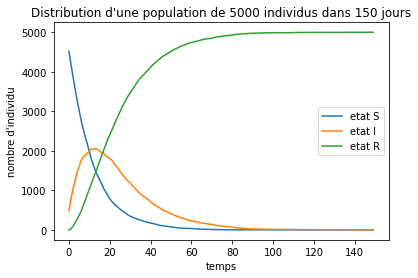

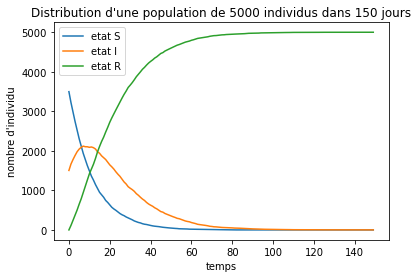

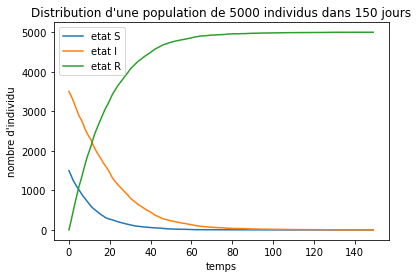

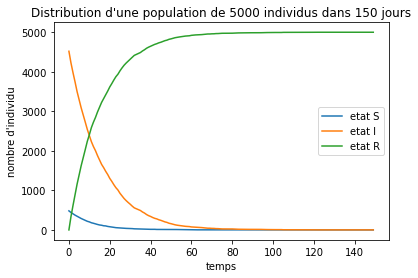

In [18]:
pi1_0=[0.9, 0.1, 0]
pi2_0=[0.7, 0.3, 0]
pi3_0=[0.3, 0.7, 0]
pi4_0=[0.1, 0.9, 0]

compter_population(A,pi1_0,150,5000,False,True,False)
compter_population(A,pi2_0,150,5000,False,True,False)
compter_population(A,pi3_0,150,5000,False,True,False)
compter_population(A,pi4_0,150,5000,False,True,False)

D'après nos graphes, on remarque que la probabilité initiale a un afflue sur le nombre d'individus, sains, infectés et gueris. Plus la probabilité d'être infecté augmente à $t=0$, plus le nombre d'infecté augmente et la probabilité d'être sain diminue. On a donc aussi une diminution du nombre d'individus sains. Cependant, la probabilité initiale n'afflue pas vraiment la convergence. La chaîne de Markov est ergodique puisqu'on voit que la simulation finit toujours par converger vers la distribution théorique.

## Question 3
### Variation des probabilités de transition

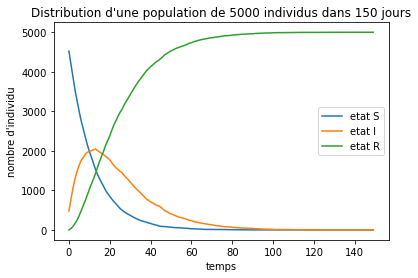

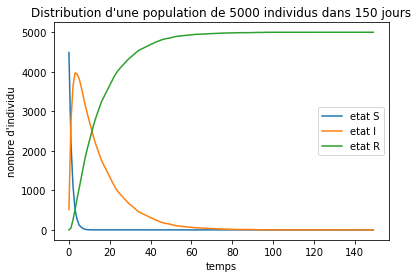

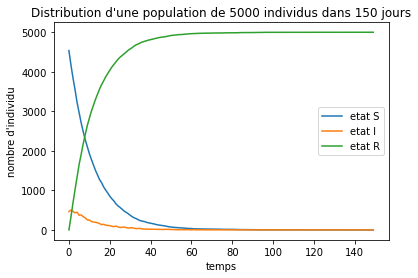

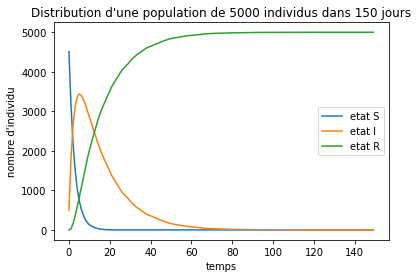

In [22]:
pi_0 = np.array([0.9,0.1,0])

#Matrice de transition de notre modèle
A = np.array([[0.92, 0.08, 0], [0, 0.93, 0.07], [0, 0, 1]])

#la probabilité d'être infecté en étant sain est de 1/2
B = np.array([[0.5, 0.5, 0], [0, 0.93, 0.07], [0, 0, 1]])

#la probabilité d'être guéri en étant infecté est augmenté par rapport â notre modèle
C = np.array([[0.92, 0.08, 0], [0, 0.3, 0.7], [0, 0, 1]])

#la probabilité d'être infecté en étant sain est augmenté par rapport â notre modèle
D = np.array([[0.7, 0.3, 0], [0, 0.93, 0.07], [0, 0, 1]])

compter_population(A,pi_0,150,5000,False,True,False)
compter_population(B,pi_0,150,5000,False,True,False)
compter_population(C,pi_0,150,5000,False,True,False)
compter_population(D,pi_0,150,5000,False,True,False)

On remarque que changer les matrices de transition change la distribution et la convergence.

# 3 Description du second modèle


## Analyse du modèle

### Question 1


Ce processus peut effectivement etre modelise par une chaine de markov car le processus est homogene, on a un nombre d'états fini et état t+1 depend que de t.


### Question 2



$$\begin{matrix}
& S & I & R \\
S & 0.92 & 0.08 & 0 \\
I & 0 & 0.93 & 0.07 \\
R & 0.02 & 0 & 0.98
\end{matrix}$$



### Question 3

Cette chaîne de Markov n'est pas périodique car il ya présence de cycle, mais elle est irréductible car tous les états sont communiquants.

### Question 4

la matrice AxA correspond a une matrice de transition au temps t+2

In [27]:
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
A2= np.dot(A,A)
#print(A2)
print("Est elle stochastique?", verifie_matrice_stochastique(A2))

Est elle stochastique? True


la matrice $A^3$ correspond a une matrice de transition au temps t+3



In [28]:
A3= np.dot(A,A2)
#print(A3)
print("Est elle stochastique?", verifie_matrice_stochastique(A3))

Est elle stochastique? True


la matrice $A^4$ correspond a une matrice de transition au temps t+4

In [29]:
A4= np.dot(A,A3)
#print(A4)
print("Est elle stochastique?", verifie_matrice_stochastique(A4))

Est elle stochastique? True


### Question 5

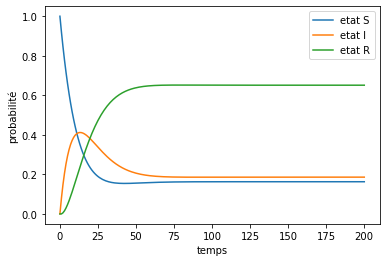

In [30]:
pi_0 = np.array([1, 0, 0])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi_0]

for i in range(0, 200):
    pi_0 = np.dot(pi_0, A)
    pi_liste.append(pi_0)
    
plt.plot(pi_liste)
plt.legend(('etat S','etat I','etat R'))
plt.xlabel('temps')
plt.ylabel('probabilité')
plt.show()

#### REMARQUES:

On constate que la distribution se stabilise a partir de t=60 avec  60% de guéris et près de 20% d'infectéset 20% de sains.\
il y a toujours une partie de la population contaminée et une autre non immunisee cela est du a la probabilité de 2% de passer de l'état guéri à l'état sain.

### Question 6

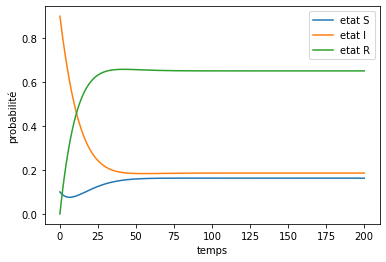

In [31]:
pi_0 = np.array([0.1, 0.9, 0])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi_0]

for i in range(0, 200):
    pi_0 = np.dot(pi_0, A)
    pi_liste.append(pi_0)
    
plt.plot(pi_liste)
plt.legend(('etat S','etat I','etat R'))
plt.xlabel('temps')
plt.ylabel('probabilité')
plt.show()

#### 1-60 % sains et 40 % gueris


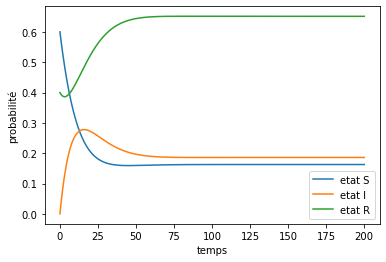

In [32]:
pi_0 = np.array([0.6, 0, 0.4])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi_0]

for i in range(0, 200):
    pi_0 = np.dot(pi_0, A)
    pi_liste.append(pi_0)
    
plt.plot(pi_liste)
plt.legend(('etat S','etat I','etat R'))
plt.xlabel('temps')
plt.ylabel('probabilité')
plt.show()

#### REMARQUES

On constate que quelque soit la distribution. Le % des gueries tend toujours vers 60%, sains et infectees vers 20%. Ce resultat pouvait etre envisager avant les tests car on sait que cette chaine de markov est ergodique( si et seulement si elle est irréductible, apériodique et récurente positive) et donc converge vers une distribution stationnaire.

### Question 7

La chaine de Markov representee sous dessus est ergodique (ergodique si et seulement si elle est irréductible,
apériodique et récurente positive.
 la distribution de probabilité $(\pi^{(n)})_{n \in N}$, la distribution stationnaire quelque soit $\pi^0$ converge vers $\pi^*$qui vérifie : \
$\pi^* = \pi^* \cdot A$ où A est la matrice de transition \
$\pi^* \cdot 1 = 1$ \
\
On a donc : \
$\pi^* = (a,b,c) = (a,b,c) \cdot A$ \
Ce qui nous donne le système d'équation suivant à résoudre : \
\
$a = 0.92a + 0.02c$ \
$b = 0.08a + 0.93b$ \
$c = 0.07b + 0.98c$ \
$a + b + c = 1$ 


Apres avoir résoud le system on obtient les résultats suivants:

$a = \frac{7}{43}$ \
$b = \frac{8}{43}$ \
$c = \frac{28}{43}$ 

on a donc 16.28% de sains, 18.6% d'infectés et 65.12% de guéris. Cela est effectivement en correlation avec les résultats des simulations

## Longueur de l’immunité


### Question 1

In [36]:
def moy_pop(T,nbrIndividu) :
    
    res = compter_population(A,pi_0,T,nbrIndividu,False,False,True)
    c = 0
    for e in res :
        c += e.count(2)
    return c / len(res)


In [37]:
m=moy_pop(150,6000)
print("La longueur moyenne d'une séquence de R est de",m)

La longueur moyenne d'une séquence de R est de 92.06233333333333


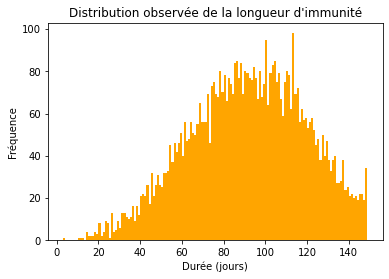

In [38]:
temp = []
l = compter_population(A,pi_0,150,6000,False,False,True)
for e in l :
    temp.append(e.count(2))
    
    
plt.hist(temp, bins=np.arange(min(temp), max(temp) + 1, 1), color='orange')
plt.title('Distribution observée de la longueur d\'immunité')
plt.ylabel("Fréquence")
plt.xlabel("Durée (jours)")
plt.show()

### Question 2

Comme la longueur d'immunité semble suivre une loi normale, on peut donc associer l'espérance a la moyenne. Pour une population de 6000 individus,on a une moyenne de 92 on peut donc conclure que la longueur d'immunité theorique est de 92 jours.


### Question 3

In [39]:
def variance_longueur_immunite(m,T,nbrIndividu) :
    liste =compter_population(A,pi_0,T,nbrIndividu,False,False,True)
    s = 0
    for e in liste :
        nb_j = e.count(2)
        s += (nb_j - m)**2
    return s / len(liste)

In [40]:
s = 0
cpt = 0
for i in range(1,50) :
    s += variance_longueur_immunite(85,150,6000)
    cpt += 1
variance= s / cpt
print(s / cpt)

803.7939013605439


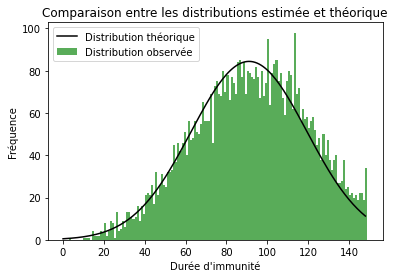

In [46]:
def distribution_theorique_I(m,T,nbrIndividu,variance):
    prob = []
    ecart_type = math.sqrt(variance)
    t=1
    for jour in range(1,T):
        t = (1 / (ecart_type * math.sqrt(2 * math.pi))) * math.exp(( -1 / (2 * variance)) * (jour - m)**2)
        prob.append(t*nbrIndividu)
        
    return prob

prob=distribution_theorique_I(m,150,6000,variance)
plt.plot(prob, color="black")
plt.hist(temp, bins=np.arange(min(temp), max(temp) + 1, 1),alpha=0.65, color="green")
plt.xlabel("Durée d'immunité")
plt.ylabel("Fréquence")
plt.title("Comparaison entre les distributions estimée et théorique")
plt.legend(["Distribution théorique","Distribution observée"])
plt.show()

## Modifier le modèle

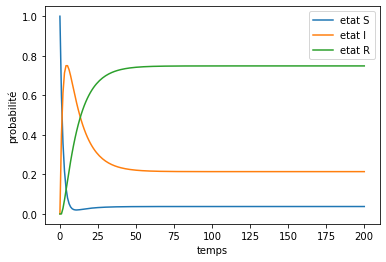

[0.03743315 0.21390375 0.7486631 ]


In [42]:
pi_0 = np.array([1, 0, 0])
A = np.array([[0.6, 0.4, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi_0]

for i in range(0, 200):
    pi_0 = np.dot(pi_0, A)
    pi_liste.append(pi_0)
    
plt.plot(pi_liste)
plt.legend(('etat S','etat I','etat R'))
plt.xlabel('temps')
plt.ylabel('probabilité')
plt.show()
print(pi_liste[-1])

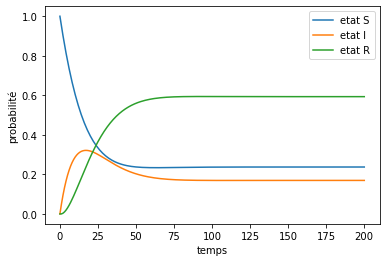

[0.23728854 0.16949177 0.59321969]


In [43]:
pi_0 = np.array([1, 0, 0])
A = np.array([[0.95, 0.05, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi_0]

for i in range(0, 200):
    pi_0 = np.dot(pi_0, A)
    pi_liste.append(pi_0)
    
plt.plot(pi_liste)
plt.legend(('etat S','etat I','etat R'))
plt.xlabel('temps')
plt.ylabel('probabilité')
plt.show()
print(pi_liste[-1])

Lorsque la probabilité pour un individu sain de devenir infecté augmente on constate une forte croissance du taux de personne infectées puis une baisse. les effectifs d'individus sains diminue dès que la distribution s'équilibre, de l'autre coté, l'effectif d'individus guéris et infectés augmente.

# 4 Confinement

T= 4: début du confinement numéro: 1
T= 17: fin du confinement numéro: 1
T= 21: début du confinement numéro: 2
T= 35: fin du confinement numéro: 2
T= 40: début du confinement numéro: 3
T= 54: fin du confinement numéro: 3
T= 61: début du confinement numéro: 4
T= 74: fin du confinement numéro: 4
T= 86: début du confinement numéro: 5
T= 99: fin du confinement numéro: 5


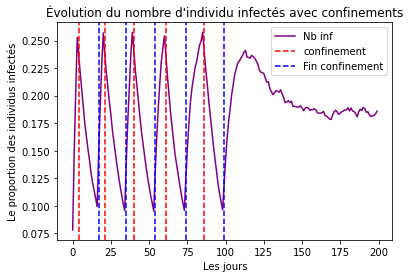

In [44]:
no_confinement = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
avec_confinement = np.array([[1, 0, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
def simulate_infection(population_size, simulation_duration):
    
    etat_ind = [[0] for _ in range(population_size)]  # population sains au debut
    transition_matrix = no_confinement
    infected = 0
    infected_evolution = []
    periode_confi = []
    confi_bool = False

    for t in range(simulation_duration):
        infected_fraction = infected / population_size

        if not confi_bool and infected_fraction >= 0.25:
            # Start restrictions
            periode_confi.append(t)
            transition_matrix = avec_confinement
            confi_bool = True
        elif confi_bool and infected_fraction < 0.1:
            # End restrictions
            periode_confi.append(t)
            transition_matrix = no_confinement
            confi_bool = False

        for i, state in enumerate(etat_ind):
            previous_state = state[-1]
            transition_probabilities = transition_matrix[previous_state]
            new_state = rd.choices([0, 1, 2], weights=transition_probabilities)[0]
            etat_ind[i].append(new_state)

            if previous_state != 1 and new_state == 1:
                infected += 1
            elif previous_state == 1 and new_state != 1:
                infected -= 1

        infected_evolution.append(infected / population_size)
        
    plt.plot(infected_evolution,color='purple')
    plt.title('Évolution du nombre d\'individu infectés avec confinements')
    count = 1
    for t in periode_confi:
        if count % 2 == 1 :
            plt.axvline(x=t, color="red", ls='--')
            print("T= "+str(t)+": début du confinement numéro: "+str(count//2 +1))
        else :
            plt.axvline(x=t, color="blue", ls='--')
            print("T= "+str(t)+": fin du confinement numéro: "+str(count//2))
        count += 1
    plt.legend(["Nb inf","confinement","Fin confinement"])
    plt.xlabel("Les jours")
    plt.ylabel("Le proportion des individus infectés")

simulate_infection(10000, 200)


D'apres les resultats du graphe ci dessus on peut conclure qu'on a generalement besoin de 4-5 confinement

# 5 Discussion

Les modèles utilisés ont été très informatifs et nous ont montré les bases d'une étude de la propagation d’une épidémie dans une population.
Cependant, ces models présentent de nombreuses limites qui rendent ses applications à la vie réelle très peu probable.

D'abord, ces modèles considèrent une probabilité d'infection indépendamment des facteurs environnementaux auxquels les individus sont exposés ils ne reflètent pas ainsi l'impact de l'infection d'un individu sur d'autres personnes. Ensuite, ces modèles ne prennent pas en compte la contagiosité d'une personne. Un individu peut être infectee mais pas encore contagieux.
Enfin, ils ne prennent pas en compte l'impact d'une mise en quarantaine.

Des améliorations possibles seront:
- prendre en compte les facteurs de contagiosité, l'âge ou même la santé d'un individu
- rajouter de nouveaux états avec celles qu'on a déjà. Par exemple, une catégorie pour les personnes infectes sans symptômes, les personnes qui decedent a cause de l'infection.